In [2]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Zad
Wygenerujmy punkty w kształcie prostej.

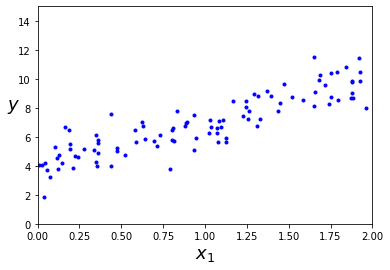

In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Zad 
Wyznacz parametry prostej regresji (najmniejszych kwadratów) ze wzoru:

$$
\theta= (X^TX)^{-1}  X^T  y; 
$$

gdzie 
$$
X = 
\begin{bmatrix}
1, x_1 \\
1, x_2 \\
\vdots, \vdots \\
1, x_n \\
\end{bmatrix}
$$

Zwizualizuj wynik.

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta_best

array([[3.95174663],
       [3.03818054]])

In [5]:
f_lr = lambda x: theta_best[0][0] * x +theta_best[1][0]
X_new= np.linspace(0., 3, 100)
y_predict= f_lr(X_new)


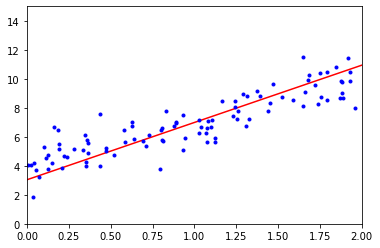

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Zad.
Prównaj z wynikiem funkcji:
```pythonLinearRegression()
```

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)
print(model.intercept_)
print(model.coef_)

[3.95174663]
[[3.03818054]]


# Zad.
Wykonaj algorytm minimalizacji gradientowej (w prostej petli).
Wykorzystaj pochodną.

Funkcja kosztu regresji:
$$
MSE(X;\theta) = \frac{1}{m} \sum ( \theta^T x_i - y_i  )^2.
$$

Pochodna funkcja kosztu regresji:

$$
\frac{\partial}{\partial \theta_j}MSE(X;\theta) = \frac{2}{m} \sum ( \theta^T x_i - y_i  )^2 x_i^{j}.
$$

Czyli gradient wynosi:

$$
\nabla_{\theta}MSE(X;\theta) = 
\begin{bmatrix}
    \frac{\partial}{\partial \theta_0}MSE\\
    \frac{\partial}{\partial \theta_1}MSE\\
    \vdots \\
    \frac{\partial}{\partial \theta_d}MSE
\end{bmatrix}
=
\frac{2}{m} X^T(\theta^TX - Y  ).
$$

Metoda gradientowa

$$
\theta^{\small \mbox{Nex step}} = \theta - \eta \nabla_{\theta} MSE
$$

### Zapisz wszystkie $\theta$ w liście 

In [58]:
eta = 0.1  # learning rate
n_iterations = 4
m = 100
theta_path_bgd = []

theta_0 = np.random.randn(2,1)  # random initialization

theta = theta_0
mse0=0.
for j in range(100):
     mse0 = mse0 + (2/m)*((theta[0][0]*X[j] + theta[1][0]*X[j] - y[j])**2)
mse0

array([101.71979551])

In [59]:
import array as arr
for i in range(n_iterations):
 theta_path_bgd.append(theta)
 mse1 = 0.
 mse0 = 0.
 for j in range(100):
     mse0 = mse0 + (2/m)*((theta[0][0]*X[j] + theta[1][0]*X[j] - y[j])**2)
     mse1 = mse0 + (2/m)*((theta[0][0]*X[j] + theta[1][0]*X[j] - y[j])**2)*X[j]
 mse= np.array([mse0,mse1])
 print(mse)
 theta = mse.dot(eta)
print(theta)

[[101.71979551]
 [103.1072484 ]]
[[542.44469339]
 [553.05547733]]
[[27227.68776363]
 [27736.76306435]]
[[76530331.660083 ]
 [77946832.4985446]]
[[7653033.1660083 ]
 [7794683.24985446]]


# Zad
Zaimplemrntu Stochastic Gradient Descent.

### Zapisz wszystkie $\theta$ w liście 

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [ ]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = theta_0


[[4.56308925]
 [3.08139533]]


# Zad
Zaimplemrntu Mini-batch gradient descent

### Zapisz wszystkie $\theta$ w liście 

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

theta = theta_0

In [ ]:
print(theta)

# Zad
Narysuj jak zmieniały parametr w różnych metodach.

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

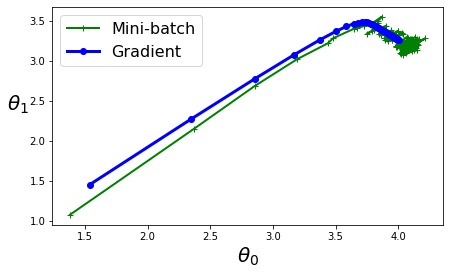